### Imports
Packages needed for project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../data')

import aggregate
import clean
import plot


%load_ext autoreload
%autoreload 2

### Data Sample
First look at data

In [46]:
initial_data = clean.read_file('../data/master.csv')
initial_data.sample(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
13535,Japan,1999,female,75+ years,1881,5516000,34.10,Japan1999,NaN,"4,562,078,822,335",38164,G.I. Generation
5447,Chile,2000,male,35-54 years,457,1920281,23.80,Chile2000,0.752,"77,860,932,152",5584,Boomers
5249,Canada,2012,female,75+ years,45,1389078,3.24,Canada2012,0.910,"1,824,288,757,448",55347,Silent
22520,Singapore,1995,male,75+ years,32,28200,113.48,Singapore1995,0.773,"87,890,009,877",31783,G.I. Generation
22742,Singapore,2013,female,55-74 years,30,384544,7.80,Singapore2013,0.909,"304,454,327,499",83151,Boomers
17529,New Zealand,1991,male,5-14 years,4,265700,1.51,New Zealand1991,NaN,"42,756,020,707",13345,Millenials
20357,Republic of Korea,1995,female,25-34 years,373,4375500,8.52,Republic of Korea1995,NaN,"556,130,926,913",13217,Generation X
5206,Canada,2009,male,75+ years,182,893202,20.38,Canada2009,NaN,"1,371,153,004,986",42933,Silent
7521,Denmark,2002,female,35-54 years,63,762841,8.26,Denmark2002,NaN,"178,635,160,297",35435,Boomers
12666,Israel,2005,male,5-14 years,2,643592,0.31,Israel2005,0.870,"142,462,925,574",22901,Millenials


### Data Cleaning
Remove columns and records that will not be utilized. <br /> 
Additionally rename columns to allow for better human readablity.

In [45]:
data = clean.clean_data(initial_data, 2016, '5-14 years',
                            '05-14 years', ['country-year', 'HDI for year'])
data.sample(10)

,Country,Year,Sex,Age,Suicides,Population,Suicides_per_100K,Annual_GDP,GDP_per_Capita,Generation
22175,Serbia,2015,female,75+ years,77,351830,21.89,"37,160,332,465",5492,Silent
11617,Hungary,2012,male,55-74 years,655,1049911,62.39,"127,856,647,108",13525,Boomers
19130,Poland,1995,male,75+ years,151,465400,32.45,"142,137,319,588",3937,G.I. Generation
11016,Guatemala,2012,male,15-24 years,118,1629819,7.24,"50,388,454,861",3779,Millenials
21417,Saint Lucia,1996,male,35-54 years,2,13179,15.18,"662,196,185",5031,Boomers
15245,Lithuania,2011,female,15-24 years,10,207726,4.81,"43,476,873,413",15097,Millenials
18361,Panama,1999,male,25-34 years,39,250022,15.60,"12,130,252,200",4606,Generation X
15630,Luxembourg,2012,male,75+ years,7,13581,51.54,"56,677,961,787",113120,Silent
19794,Puerto Rico,1994,female,75+ years,2,89539,2.23,"39,690,630,000",11871,G.I. Generation
16129,Malta,2011,female,05-14 years,0,20542,0.00,"9,507,645,260",23984,Generation Z


### Initial Overview
Views of overall data without grouping or filters

<AxesSubplot:title={'left':'Global Suicide Rate'}, xlabel='Year', ylabel='Suicides per 100K'>

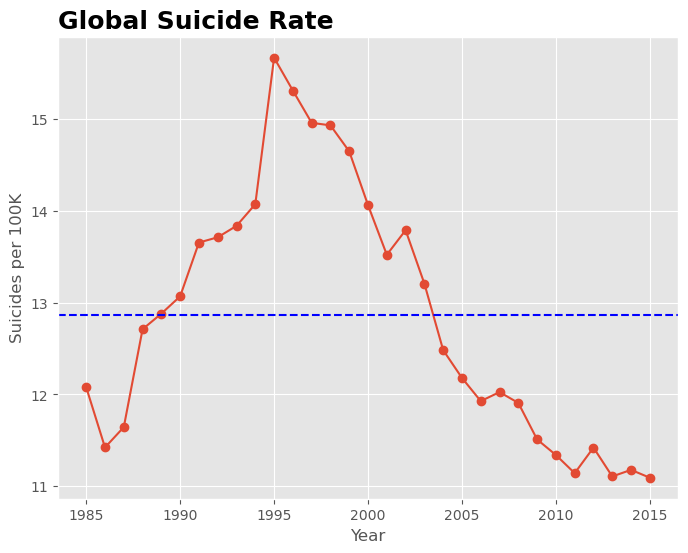

In [4]:
plt.style.use('ggplot')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


plot.annual_rate_plot(data, 'Global Suicide Rate', 'Year', 'Suicides per 100K')

Global Map View

In [39]:
country_total = aggregate.column_total(data, 'Country')

plot.world_map(country_total)

### Male vs Female
Review entire dataset with male vs female by year

<AxesSubplot:title={'left':'Suicide Rate (by Gender)'}, xlabel='Year', ylabel='Suicides per 100K'>

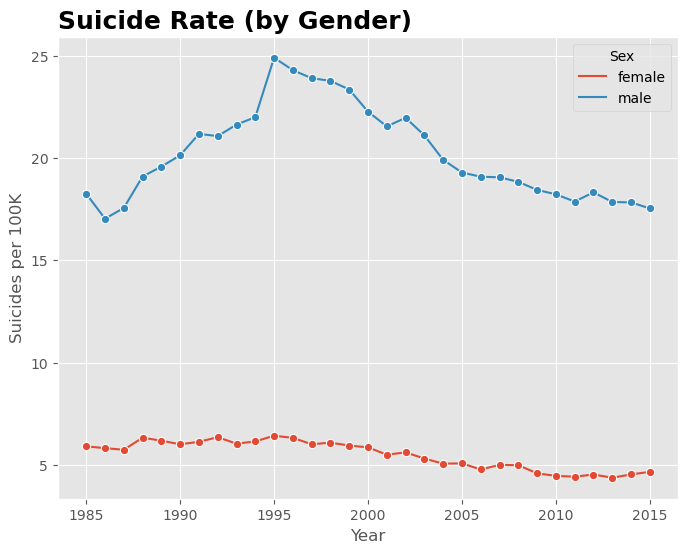

In [6]:
male_female = aggregate.coloumn_mean(data, ['Year', 'Sex'])

plot.line_plot(male_female, 'Year', 'Suicides_per_100K', 'Suicide Rate (by Gender)', 'Year', 'Suicides per 100K', 'Sex')

### Males and Females V2
Seperate veiw of male vs female with medians and ranges

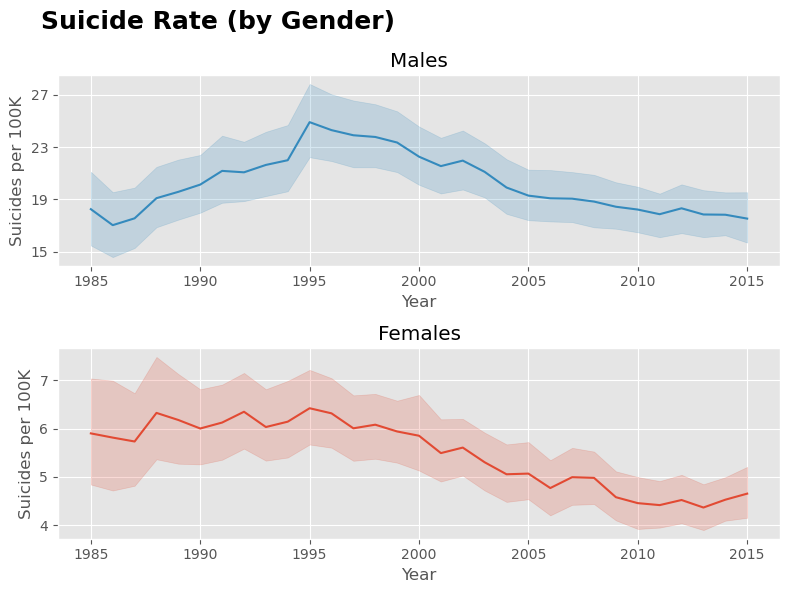

In [7]:
males = aggregate.column_filter(data, 'Sex', 'male')
females = aggregate.column_filter(data, 'Sex', 'female')

plot.two_plot(males, 'Males', females, 'Females', 'Suicide Rate (by Gender)', 'Year', 'Suicides per 100K', colors)

### Generations

<AxesSubplot:title={'left':'Suicide Rate (by Generation)'}, xlabel='Year', ylabel='Suicides per 100K'>

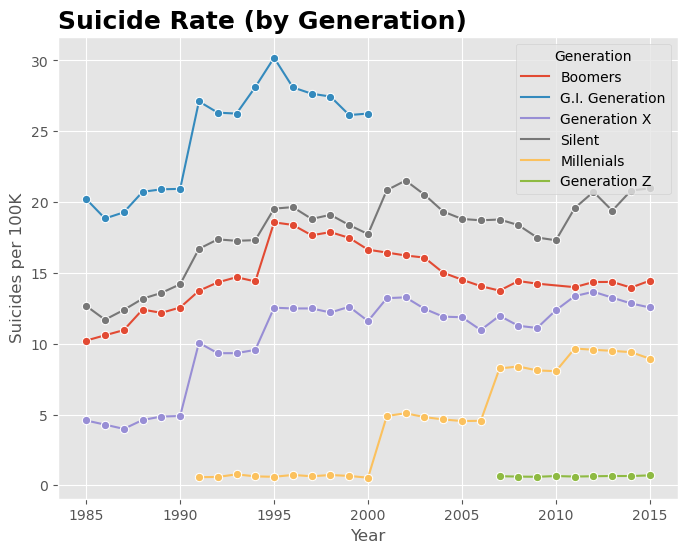

In [8]:
generations = aggregate.coloumn_mean(data, ['Year', 'Generation'])

plot.line_plot(generations, 'Year', 'Suicides_per_100K', 'Suicide Rate (by Generation)', 'Year', 'Suicides per 100K', 'Generation')

### Ages

<AxesSubplot:title={'left':'Suicide Rate (by Age)'}, xlabel='Year', ylabel='Suicides per 100K'>

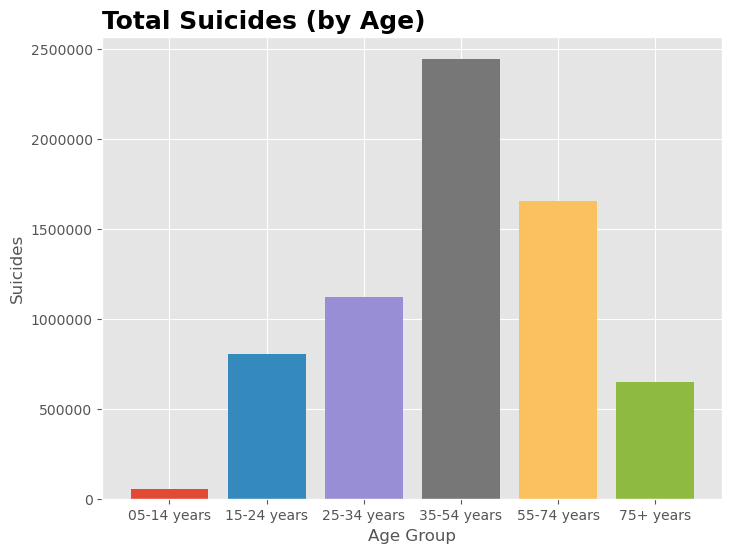

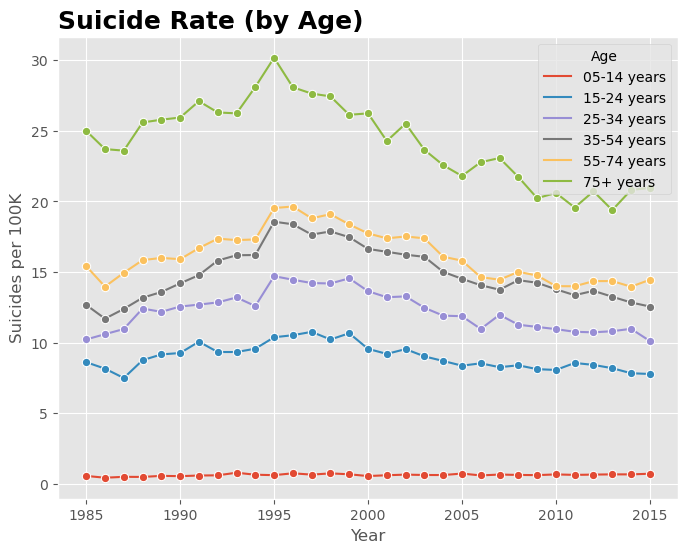

In [9]:
# Bar plot for total suicides by age
ages_grouped = aggregate.column_total(data, 'Age').sort_values('Age', ascending=True)
plot.bar_plot(ages_grouped, 'Age', 'Suicides', 'Total Suicides (by Age)', 'Age Group', 'Suicides', colors)

# Line plot for mean by age
ages = aggregate.coloumn_mean(data, ['Year', 'Age'])
plot.line_plot(ages, 'Year', 'Suicides_per_100K', 'Suicide Rate (by Age)', 'Year', 'Suicides per 100K', 'Age')

### Country Totals
Compare total suicides and suicide rate of the highest 5 countries

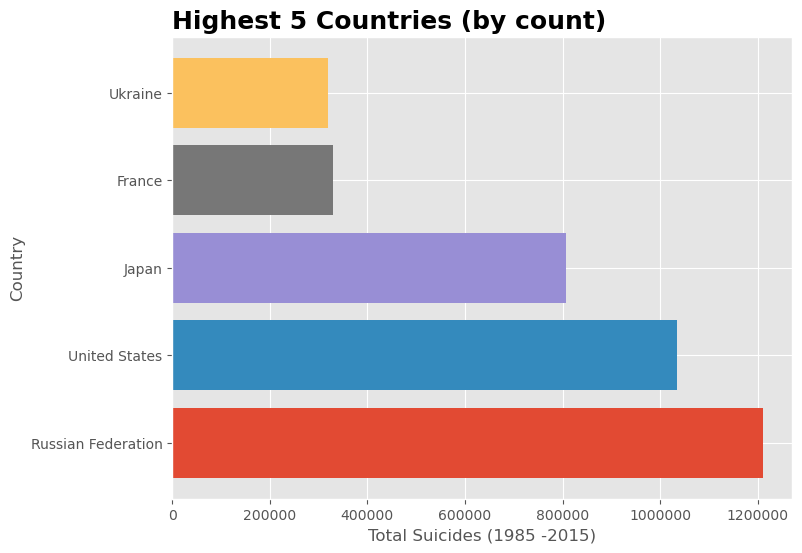

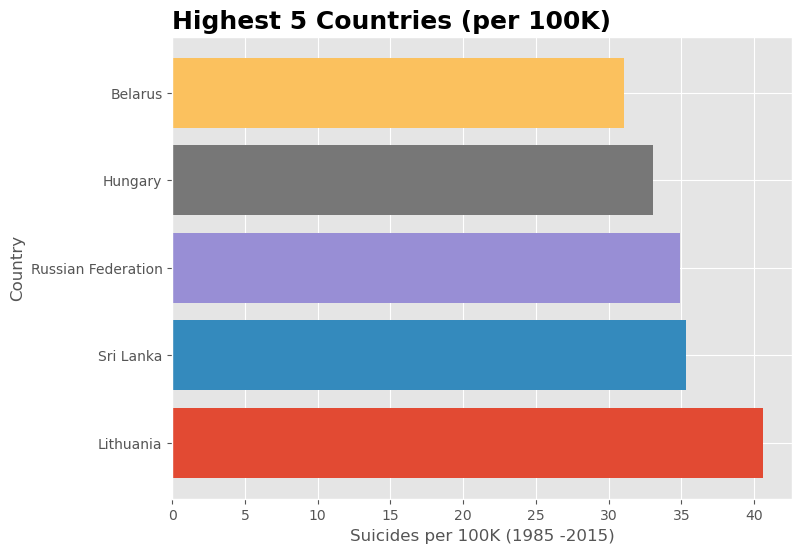

In [10]:
high_five = country_total.sort_values('Suicides', ascending=False)[:5]
plot.hbar_plot(high_five, 'Country', 'Suicides', 'Highest 5 Countries (by count)', 'Total Suicides (1985 -2015)', 'Country', colors)

high_five_ratio = data['Suicides_per_100K'].groupby(data.Country).mean().sort_values(ascending=False)[:5]
plot.ser_hbar_plot(high_five_ratio, 'Highest 5 Countries (per 100K)', 'Suicides per 100K (1985 -2015)', 'Country', colors)

### Correlation
Explore the correlation of the different aspects of the data

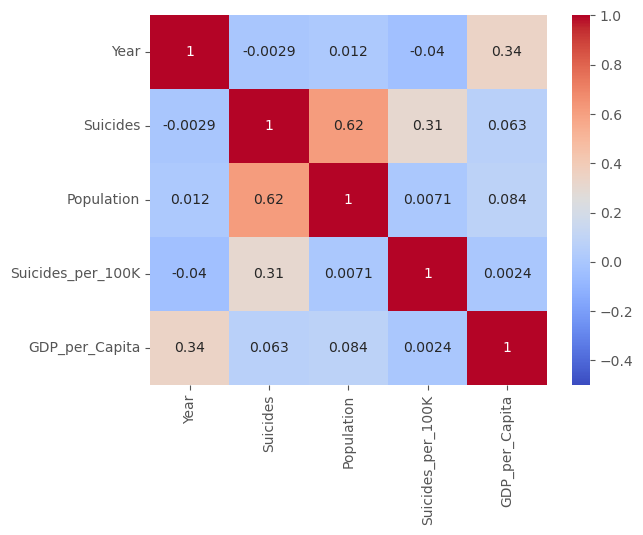

In [38]:
plot.correlation_plot(data)